# Final Project

In [11]:
# import relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
import random
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.linear_model import LinearRegression
from matplotlib.figure import Figure

sns.set_theme()

## Data wrangling

In [12]:
# high-tech companies data
tesla = pd.read_csv("tesla.csv")
microsoft = pd.read_csv("microsoft.csv")
meta = pd.read_csv("meta.csv")

# other company
zoom = pd.read_csv("zoom.csv")
pfizer = pd.read_csv("pfizer.csv")
airbnb = pd.read_csv("airbnb.csv")

dataset = [tesla, microsoft, meta, zoom, pfizer, airbnb]
company = ["tesla", "microsoft", "meta", "zoom", "pfizer", "airbnb"]
for i in range(0, len(dataset)):
  # add the company label to each corresponding dataset
  dataset[i]["company"] = company[i]

  # check if there is any null data in the datasets
  null = len(dataset[i][dataset[i].isnull().T.any()==True])

  # print out the result of whether there is any null data
  print("The ", company[i], "dataset has", null, "rows of null data.")


The  tesla dataset has 0 rows of null data.
The  microsoft dataset has 0 rows of null data.
The  meta dataset has 0 rows of null data.
The  zoom dataset has 0 rows of null data.
The  pfizer dataset has 0 rows of null data.
The  airbnb dataset has 0 rows of null data.


## Data Visualization

In [13]:
high_tech = pd.concat([tesla,meta,microsoft], ignore_index = True)
high_tech['Date'] = pd.to_datetime(high_tech['Date'], format="%Y-%m-%d")
high1 = high_tech[high_tech['Date'] > "2019-01-01"]
high1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,company
324,2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000,tesla
325,2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000,tesla
326,2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500,tesla
327,2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000,tesla
328,2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500,tesla


<Figure size 2000x1800 with 0 Axes>

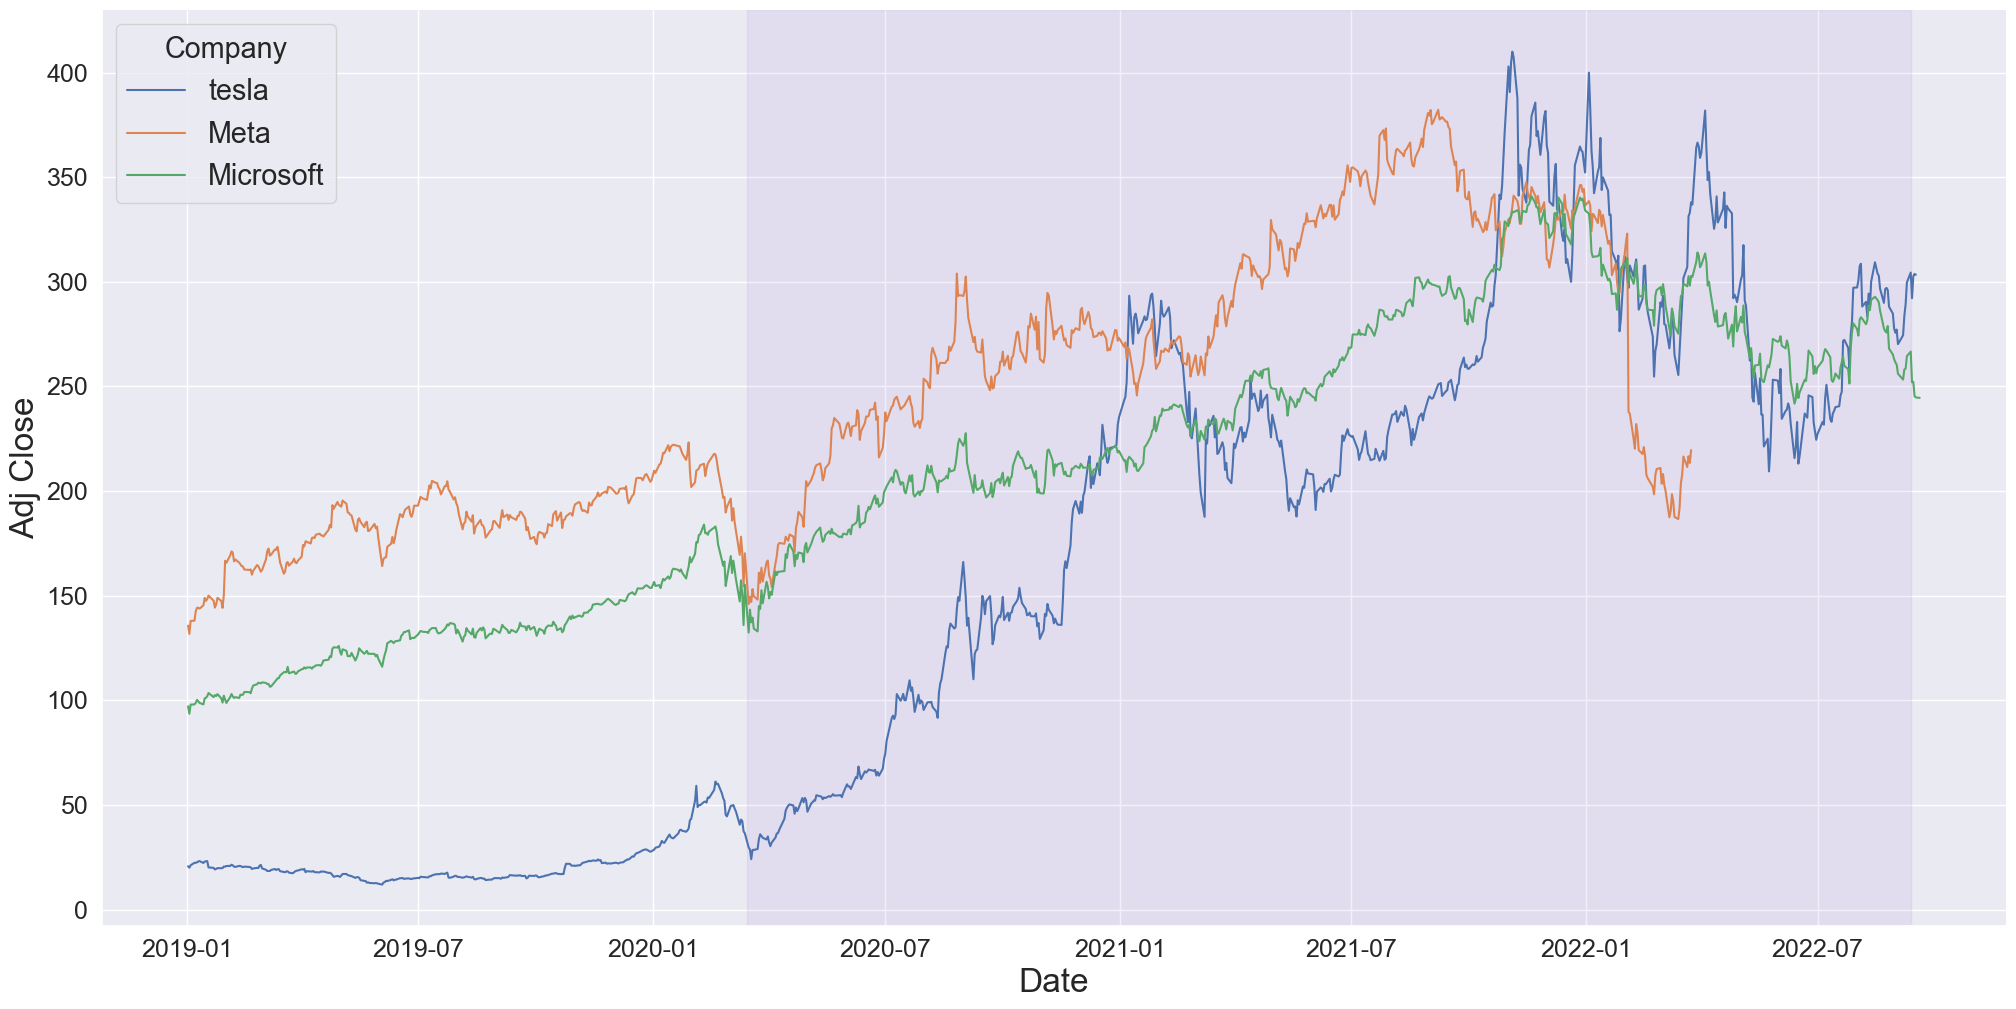

In [15]:
plt.figure(figsize = (20, 18))

from datetime import date

recent = sns.relplot(data = high1, x = "Date", y = "Adj Close", hue = "company",
                     kind = "line", aspect = 2, height = 10, legend = False)

plt.legend(title='Company', loc='upper left', labels=['tesla', 'Meta',
                                                      'Microsoft'],
            title_fontsize = 'xx-large', fontsize = 'xx-large')

plt.xticks(fontsize = 18)
plt.xlabel("Date", fontsize = 24)
plt.yticks(fontsize = 18)
plt.ylabel("Adj Close", fontsize = 24)

# States (of the USA) began to implement shutdowns in order to prevent the 
  # spread of COVID-19 on March 15, 2022, according to the CDC 
  # (https://www.cdc.gov/museum/timeline/covid19.html).
covid_start = date(2020, 3, 15)

# September 12, 2022 is the last date from our high1 data.
covid_end = date(2022, 9, 12)

# The line below adds the rectangle that covers the COVID period of our graph.
  # Opacity is reduced to make it easier to see.
plt.axvspan(covid_start, covid_end, alpha=0.1, color = "mediumpurple")

plt.savefig('data/SixComp_linegraph.png')
plt.show()

In [16]:
covid = pd.concat([high_tech, zoom, pfizer, airbnb], ignore_index = True)
covid['Date'] = pd.to_datetime(covid['Date'], format="%Y-%m-%d")
covid1 = covid[covid['Date'] > "2019-01-01"]
covid1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,company
324,2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000,tesla
325,2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000,tesla
326,2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500,tesla
327,2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000,tesla
328,2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500,tesla


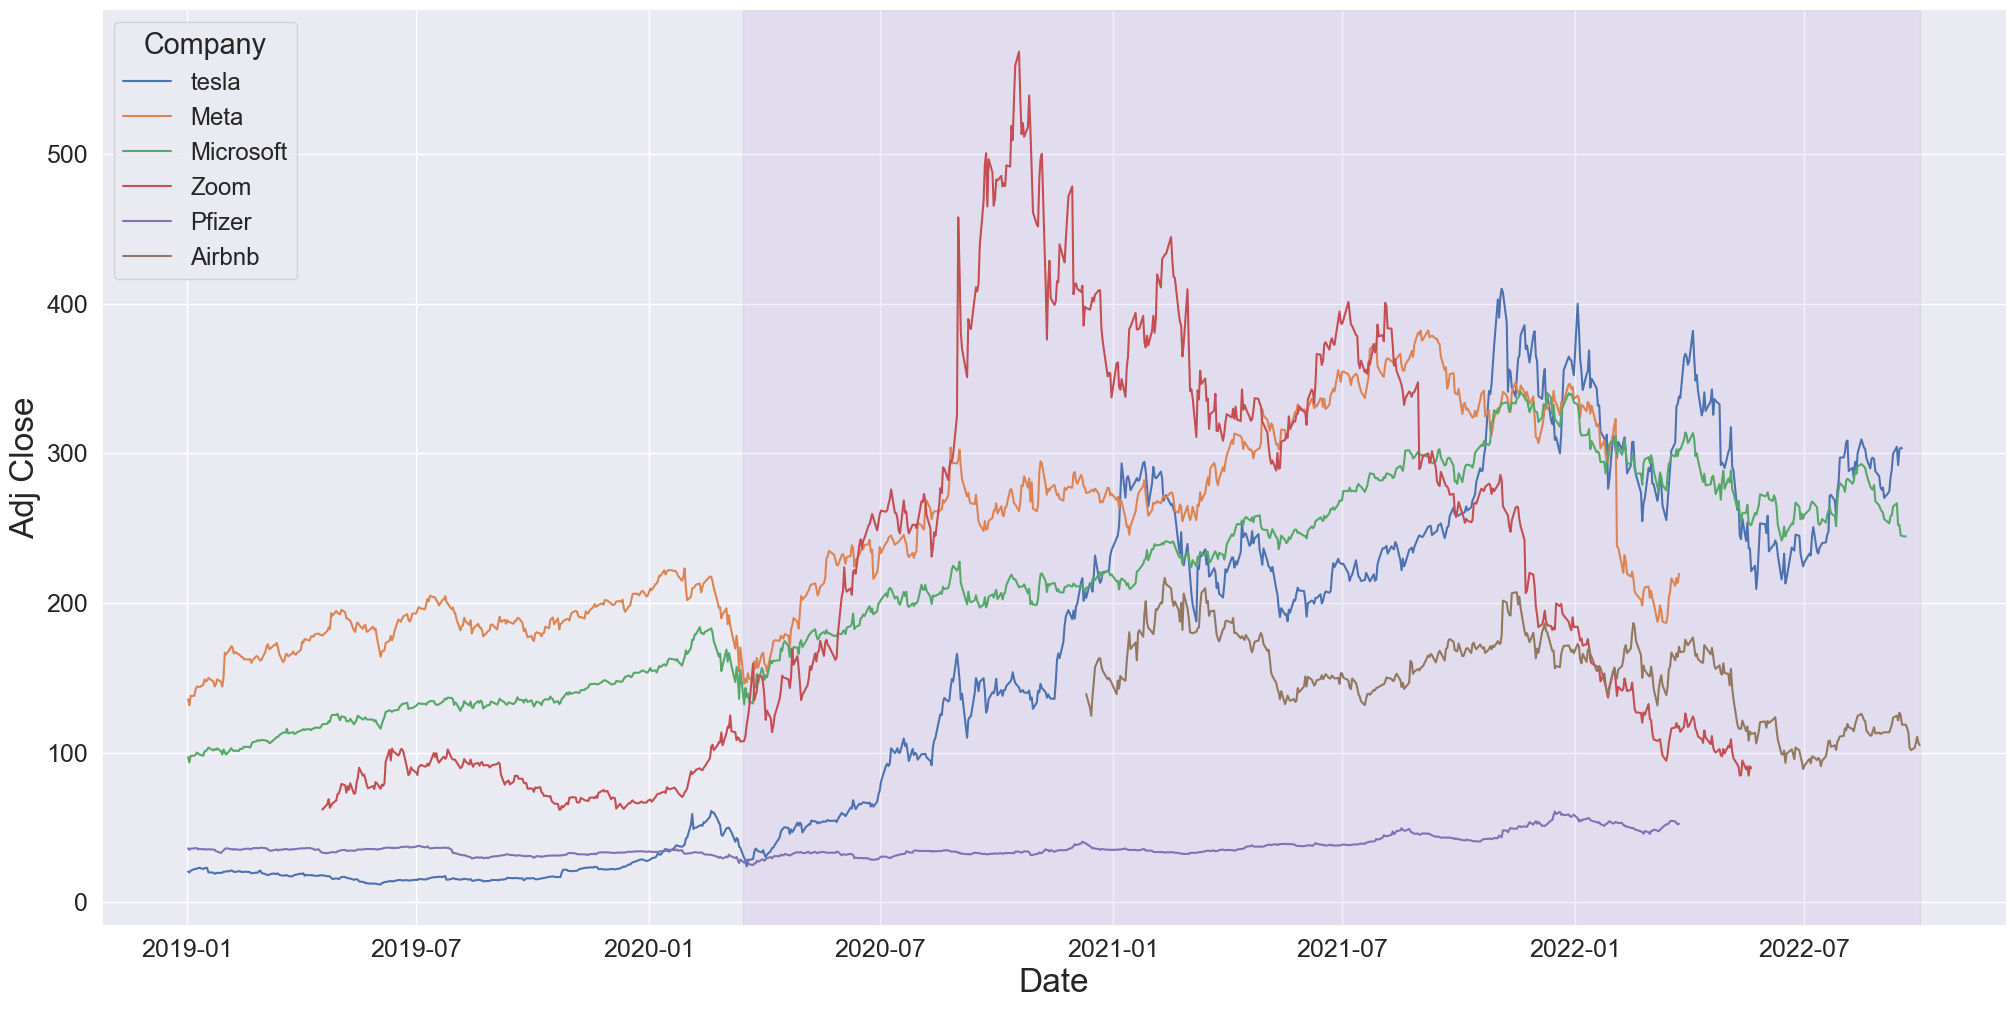

In [17]:
allComp = sns.relplot(data = covid1, x = "Date", y = "Adj Close",
                      hue = "company", kind = "line", aspect = 2, height = 10,
                      legend = False)
plt.legend(title='Company', loc='best', labels=['tesla', 'Meta', 'Microsoft',
                                                'Zoom', 'Pfizer', 'Airbnb'], 
           title_fontsize = 'xx-large', fontsize = 'x-large')
plt.xticks(fontsize = 18)
plt.xlabel("Date", fontsize = 24)
plt.yticks(fontsize = 18)
plt.ylabel("Adj Close", fontsize = 24)

# States (of the USA) began to implement shutdowns in order to prevent the
  # spread of COVID-19 on March 15, 2022, according to the CDC
  # (https://www.cdc.gov/museum/timeline/covid19.html).
covid_start2 = date(2020, 3, 15)

# September 30, 2022 is the last date from our covid1 data.
covid_end2 = date(2022, 9, 30)

# The line below adds the rectangle that covers the COVID period of our graph.
  # Opacity is reduced to make it easier to see.
plt.axvspan(covid_start2, covid_end2, alpha=0.1, color = "mediumpurple")

plt.savefig('SixComp_linegraph.png')
plt.show()

ValueError: The number of FixedLocator locations (21), usually from a call to set_ticks, does not match the number of ticklabels (20).

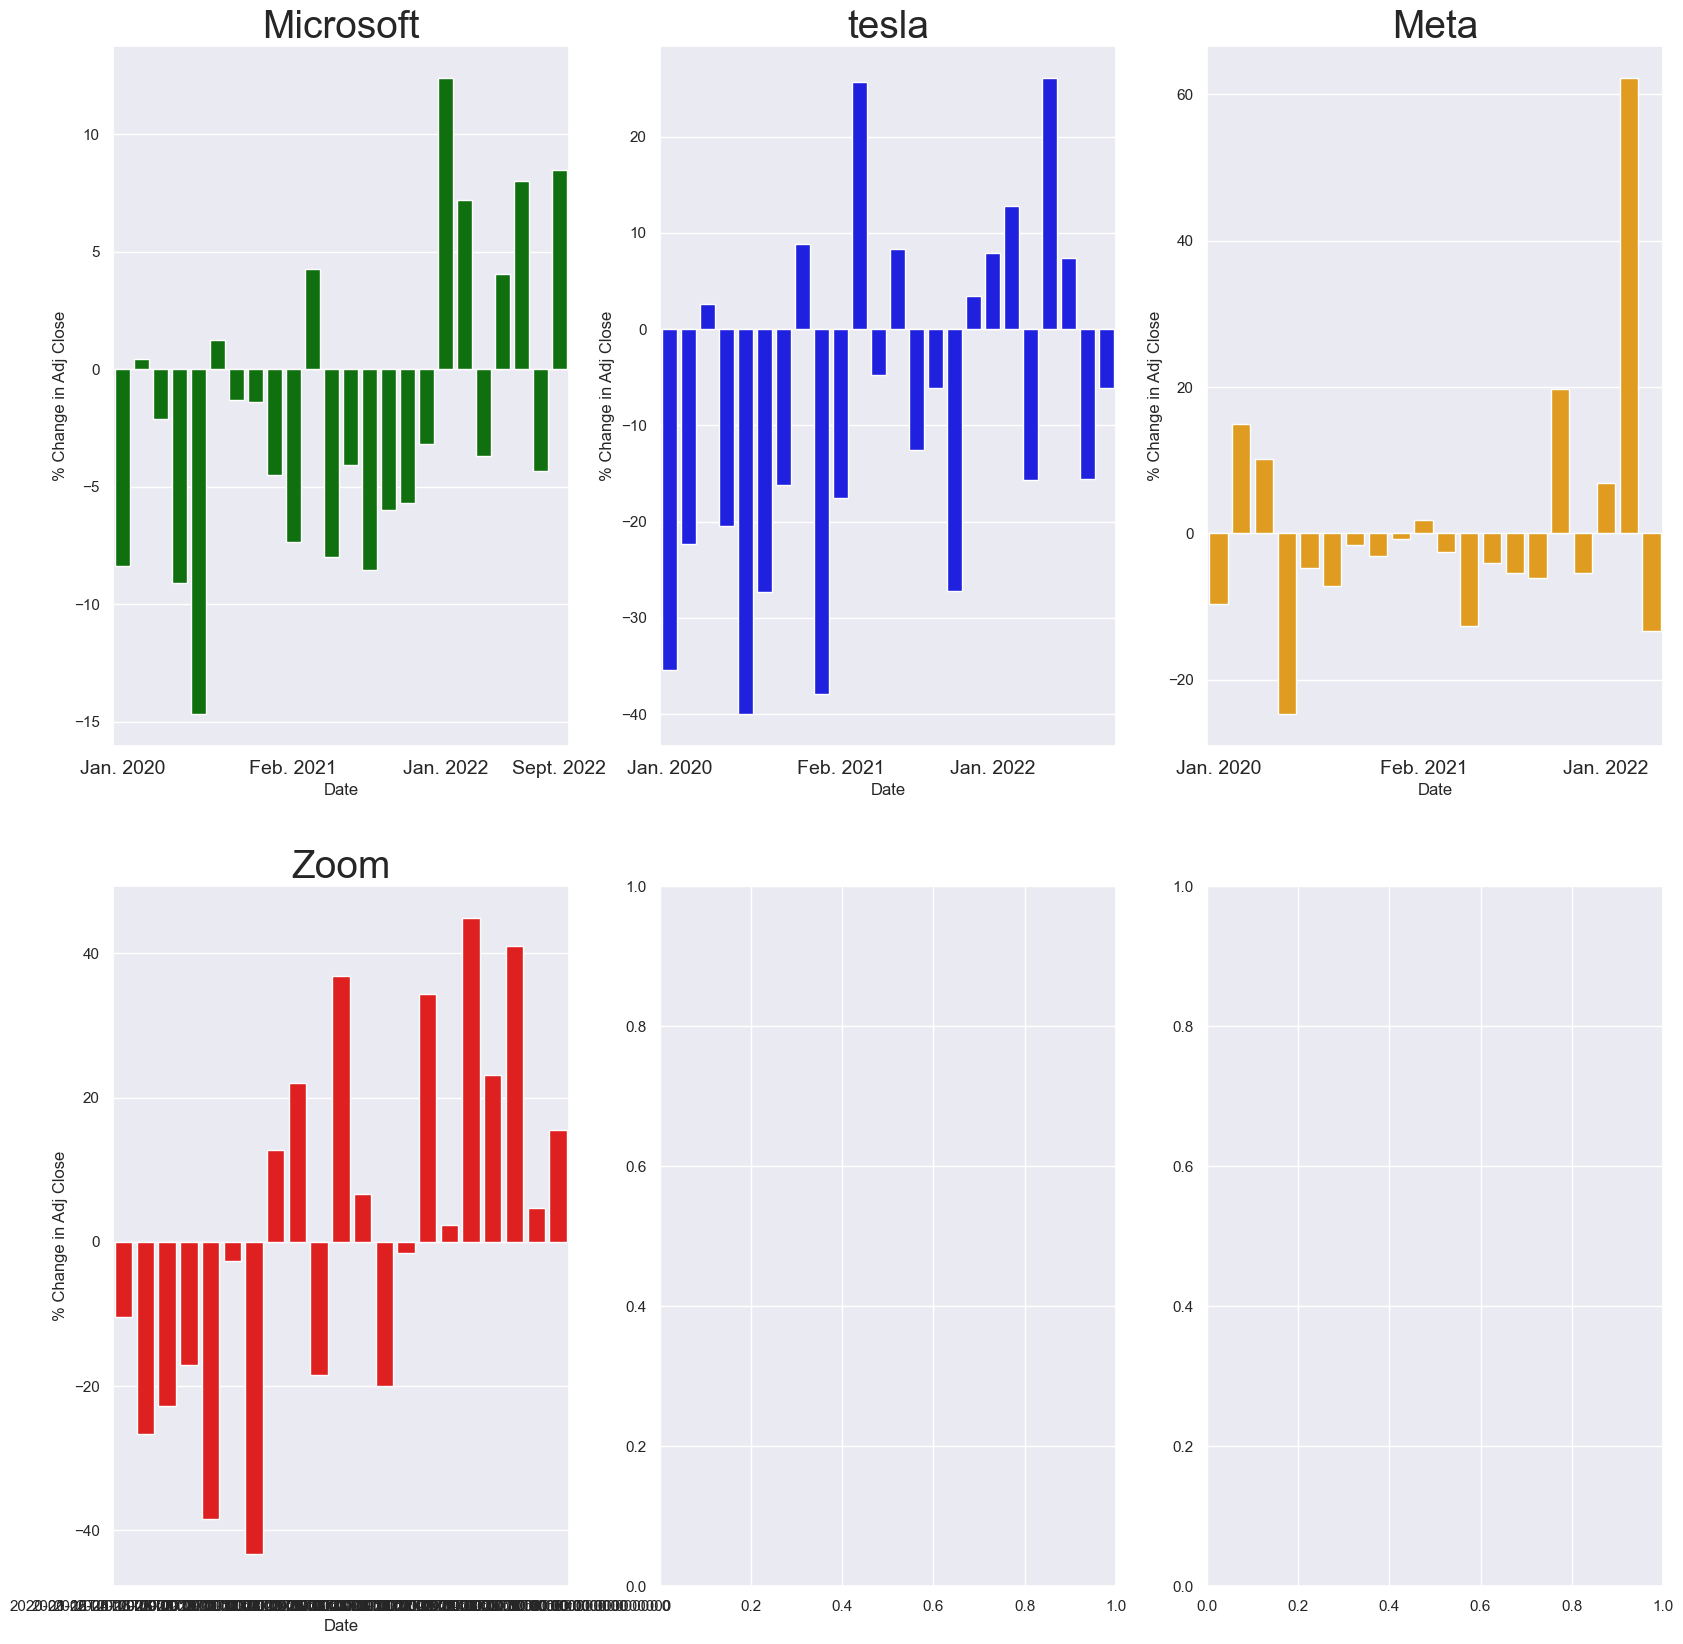

In [18]:
# This function selects the data within covid period for the six companies.
def plot2_data(df):
  df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
  df1 = df[df['Date'] >= "2019-12-01"]
  return df1

microsoft_1 = plot2_data(microsoft)
tesla_1 = plot2_data(tesla)
meta_1 = plot2_data(meta)

zoom_1 = plot2_data(zoom)
pfizer_1 = plot2_data(pfizer)
airbnb_1 = plot2_data(airbnb)

# Creating a list of the dataframes to use in loops later
covid_dfs = [microsoft_1, tesla_1, meta_1, zoom_1, pfizer_1, airbnb_1]




'''
reset_df() resets the index of a dataframe and automatically drops the
old index.

Parameter(s): Dataframe
Returns: The same dataframe with indices reset and starting at 0.
'''
def reset_df(df):
  df.reset_index(drop=True, inplace = True)
  return

# Reset all dataframe indices by iterating through them.
  # Dataframes need to have reset indices because the columns will be used
  # for calculations later across the rows.
for i in range(len(covid_dfs)):
  reset_df(covid_dfs[i])




'''
find_every_30() filters a dataframe so that it only contains every 30th row.
It includes the 0th row of the original dataframe and ensures that the last row
of the original dataframe is also included in the output, even if that last row
did not have an index that was a multiple of 30.

Parameter(s): Dataframe
Returns: The same dataframe with every 30th row, as well as the first and last
rows.
'''
def find_every_30(df):
  every_30 = df[df.index % 30 == 0]
  if ((df.shape[0] % 30) != 0):
    # Grab the last row since it wasn't included
    last_row = df[-1:]
    # Add last row
    every_30 = pd.concat([every_30, last_row])
  return every_30

# Run function on all dataframes by iterating through them.
  # Dataframes need to be filtered to create intervals of about 30 days,
  # which roughly correspond to about 30 rows per interval. Intervals will be 
  # used for the x-axis on the bar plots at the end of this code chunk, with 
  # one bar per interval.
for j in range(len(covid_dfs)):
  covid_dfs[j] = find_every_30(covid_dfs[j])




# Reset indices again so math with the columns will work later.
for k in range(len(covid_dfs)):
  reset_df(covid_dfs[k])




'''
shifted_copy() makes a list copy of a Pandas series and duplicates the first
value, subsequently pushing the rest of the values in the series down by one
index. This function also converts that list into a series and drops the last
value so that the copy is the same length that the original input was.
'''
def shifted_copy(ac_1):
  # Make adj close into new list but duplicate the row 0 value
  ac_2 = [ac_1.iloc[0]]
  ac_2[1:] = ac_1

  # Convert list to series
  ac_2 = pd.Series(ac_2, name="Adj Close 2")
  
  # Drop the last value so we don't have length issues
  ac_2 = ac_2.drop(ac_2.size-1)

  return ac_2

# Making a list to hold all of the Adj Close 2 columns
ac_2 = [1]*7

# Run function on all dataframes by iterating through them
  # This function will be used to create a column that can be subtracted from
  # the original Adj Close column in order to get the difference in stock prices
  # between the beginning and the end of a 30 row interval.
for l in range(len(covid_dfs)):
  ac_2[l] = shifted_copy(covid_dfs[l]["Adj Close"])




'''
create_bp_df() constructs the dataframe needed for the barplots below by
concatenating a dates column, the corresponding Adj Close column, and the Adj 
Close 2 column created by shifted_copy().
'''
def create_bp_df(dates, ac_1, ac_2):
  bp_df = pd.concat([dates, ac_1,ac_2],axis=1)
  return bp_df

# Making list to hold all of the dataframes needed for the bar plots
bp_df = [1]*7

# Run function on all dataframes by iterating through them
for m in range(len(covid_dfs)):
  bp_df[m] = create_bp_df(covid_dfs[m]["Date"],
                          covid_dfs[m]["Adj Close"], ac_2[m])




'''
calc_change() first finds the difference between the Adj Close 2 and Adj Close
columns, divides that difference by the Adj Close column, and multiplies that
value by 100 in order to calculate the change in percentage of stocks over 
a 30 row interval. Since the first row of the dataframe was just a filler to
assist in shifting the Adj Close 2 column downward during its creation in
shifted_copy(), this function also removes the first row of the dataframe.
'''
def calc_change(bp_df):
  # Subtract to get the difference between start and end of 30 row periods
  bp_df["AC Diff"] = bp_df["Adj Close 2"] - bp_df["Adj Close"]
  
  # Divide by first Adj Close and multiply by 100 to get 
    # percentage increase or decrease
  bp_df["% Change in Adj Close"] = (bp_df["AC Diff"]/bp_df["Adj Close"])*100
  
  # Delete the first pointless row
  bp_df = bp_df.drop([0])
  return bp_df

# Run function on all dataframes by iterating through them
for n in range(len(covid_dfs)):
  bp_df[n] = calc_change(bp_df[n])




# Make bar plots. Axes are different for each subplot because they each use
  # a different dataframe.
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3,
                                                   figsize=(20,20))



# Microsoft plot
sns.barplot(data=bp_df[0], x="Date", y="% Change in Adj Close",
            color="green", ax=ax1)
ax1.set_title("Microsoft", fontsize=28)

# Setting tick locations. locs1 has a length of 24 because there are 24
  # 30-row intervals/bars for Microsoft's bar plot dataset. These specific
  # intervals (rows of the dataframe) were chosen because they start a new year,
  # except for the last row, which was chosen because there were several rows
  # of data left after the third interval.
locs1 = [""]*24
locs1[0] = "Jan. 2020"
locs1[9] = "Feb. 2021"
locs1[17] = "Jan. 2022"
locs1[23] = "Sept. 2022"

plt.sca(ax1)
plt.xticks(range(24), locs1, fontsize=14)




# tesla plot
sns.barplot(data=bp_df[1], x="Date", y="% Change in Adj Close",
            color="blue",  ax=ax2)
ax2.set_title("tesla", fontsize=28)

# Setting tick locations. locs2 has a length of 20 because there are 20
  # 30-row intervals/bars for teslas's bar plot dataset. These specific
  # intervals (rows of the dataframe) were chosen because they start a new year.
locs2 = [""]*20
locs2[0] = "Jan. 2020"
locs2[9] = "Feb. 2021"
locs2[17] = "Jan. 2022"

plt.sca(ax2)
plt.xticks(range(20), locs2, fontsize=14)




# Meta plot
sns.barplot(data=bp_df[2], x="Date", y="% Change in Adj Close",
            color="orange",  ax=ax3)
ax3.set_title("Meta", fontsize=28)

# Tick locations are the same as tesla because the rows starting new years
  # are at the same indices.
plt.sca(ax3)
plt.xticks(range(20), locs2, fontsize=14)




# Zoom plot
sns.barplot(data=bp_df[3], x="Date", y="% Change in Adj Close",
            color="red",  ax=ax4)
ax4.set_title("Zoom", fontsize=28)

# Tick locations are the same as tesla because the rows starting new years
  # are at the same indices. Range has been changed to 21 because there are
  # 21 rows for Zoom in the bar plot dataframe.
plt.sca(ax4)
plt.xticks(range(21), locs2, fontsize=14)




# Pfizer plot
sns.barplot(data=bp_df[4], x="Date", y="% Change in Adj Close",
            color="purple",  ax=ax5)
ax5.set_title("Pfizer", fontsize=28)

# Tick locations are the same as tesla because the rows starting new years
  # are at the same indices.
plt.sca(ax5)
plt.xticks(range(20), locs2, fontsize=14)




# Airbnb plot
sns.barplot(data=bp_df[5], x="Date", y="% Change in Adj Close",
            color="brown",  ax=ax6)
ax6.set_title("Airbnb", fontsize=28)

# Setting tick locations.  locs6 has a length of 16 because there are 16
  # 30-row intervals/bars for Airbnb's bar plot dataset. These specific
  # intervals (rows of the dataframe) were chosen because they start a new year.
locs6 = [""]*16
locs6[0] = "Jan. 2021"
locs6[8] = "Jan. 2022"
locs6[15] = "Sept. 2022"

plt.sca(ax6)
plt.xticks(range(16), locs6, fontsize=14)

## Stock Prediction

We specifically use the data during Covid (from 2019.11 till now).

In [19]:
# This function selects the data within covid period for the six company
def covid_data(df):
  df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
  df1 = df[df['Date'] >= "2019-12-01"]
  df1 = df1.set_index('Date')
  return df1

microsoft_1 = covid_data(microsoft)
tesla_1 = covid_data(tesla)
meta_1 = covid_data(meta)

zoom_1 = covid_data(zoom)
pfizer_1 = covid_data(pfizer)
airbnb_1 = covid_data(airbnb)


### LSTM Neural Network

In [20]:
# This function performs the process of stock prediction using
  # LSTM neural network
# Input
# data: stock dataset for predictionn
# window size: how many previous days' data the prediction depends on
# input_col: the column used for prediction
# train_size: the proportion of data used for training
# Output
# prediction_inverse: predicted results for the stock data
# mse: mean squared error of the predicted results
# y_test: true value of the stock
def my_LSTM(data, window_size=15, input_col=4, train_size=0.7):
  length = data.shape[0]

  # set the training data for prediction
  train_data = data.iloc[:(int(length*train_size)+ window_size),
                         input_col:input_col+1]

  # change the data into range (0, 1)
  scaler = MinMaxScaler()
  train_data_transform=scaler.fit_transform(np.array(train_data))

  x_train, y_train=[], []
  for i in range(len(train_data_transform)-window_size):
      x_train.append(train_data_transform[i:i+window_size])
      y_train.append(train_data_transform[i+window_size])
  x_train = np.array(x_train)
  y_train = np.array(y_train)

  # LSTM for stock prediction
  model = Sequential()
  model.add(LSTM(64, activation = 'relu',
                 input_shape = (x_train.shape[1], x_train.shape[2]),
                 return_sequences = True))
  model.add(LSTM(32, activation = 'relu', return_sequences = False))
  model.add(Dropout(0.2))
  model.add(Dense(1))
  model.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy'])
  model.summary()

  # train the model
  model.fit(x_train, y_train, epochs = 10, batch_size = 20)

  # test the result of LSTM
  test_data = data.iloc[int(length*train_size) - window_size:,
                        input_col:input_col+1]

  # transform the format of test data
  test_input_shape=test_data.values.reshape(-1,1)
  test_input_shape = scaler.transform(test_input_shape) #only transforming the test data.
          
  X_test = []
  for i in range(window_size, len(test_data)): 
      X_test.append(test_input_shape[i-window_size:i, 0])
  X_test = np.array(X_test)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

  # make prediction for the test data
  prediction = model.predict(X_test)
  prediction_inverse = scaler.inverse_transform(prediction)

  # calculate the error of the prediction
  y_test = data.iloc[int(length*train_size):, input_col:input_col+1].values
  mse = mean_squared_error(y_test, prediction_inverse)

  return prediction_inverse, mse, y_test

### Baseline Model--Linear Regression

In [21]:
# This function performs the linear regression model
# Input
# df: stock dataset for predictionn
# train_size: the proportion of data used for training
# Output
# prediction: predicted results for the stock data
# mse: mean squared error of the predicted results
# r2: r^2 of the model
# y_test: true value of the stock
def my_LinearRegression(df, train_size=0.7):
  newdf = df.copy()
  newdf['Time'] = np.arange(len(newdf.index))
  data = newdf[["Time"]].values
  target = newdf["Adj Close"].values
  y_test = target[int(len(data)*train_size):]
  
  linear_model = LinearRegression()
  linear_model.fit(X = data[0 : int(len(data)*train_size)],
                   y = target[0 : int(len(data)*train_size)])
  prediction = linear_model.predict(data[int(len(data)*train_size):])


  mse = mean_squared_error(newdf["Adj Close"].iloc[int(len(data)*train_size):].values,
                           prediction) # float: MSE of your model
  r2 = r2_score(newdf["Adj Close"].iloc[int(len(data)*train_size):].values, prediction)
  
  return prediction, mse, r2, y_test

### Run the LSTM and Baseline Model for all six companies

In [22]:
random.seed(10)
# microsoft
pred_lstm1, mse_lstm1, y_test_lstm1 = my_LSTM(microsoft_1)                   #LSTM
pred_lr1, mse_lr1, rs1, y_test_lr1 = my_LinearRegression(microsoft_1)         # Baseline

# tesla
pred_lstm2, mse_lstm2, y_test_lstm2 = my_LSTM(tesla_1)                      # LSTM
pred_lr2, mse_lr2, rs2, y_test_lr2 = my_LinearRegression(tesla_1)            # Baseline

# meta
pred_lstm3, mse_lstm3, y_test_lstm3 = my_LSTM(meta_1)                       # LSTM
pred_lr3, mse_lr3, rs3, y_test_lr3 = my_LinearRegression(meta_1)             # Baseline

# zoom
pred_lstm4, mse_lstm4, y_test_lstm4 = my_LSTM(zoom_1)                       # LSTM
pred_lr4, mse_lr4, rs4, y_test_lr4 = my_LinearRegression(zoom_1)             # Baseline

# pfizer
pred_lstm5, mse_lstm5, y_test_lstm5 = my_LSTM(pfizer_1)                       # LSTM
pred_lr5, mse_lr5, rs5, y_test_lr5 = my_LinearRegression(pfizer_1)             # Baseline

# airbnb
pred_lstm6, mse_lstm6, y_test_lstm6 = my_LSTM(airbnb_1)                      # LSTM
pred_lr6, mse_lr6, rs6, y_test_lr6 = my_LinearRegression(airbnb_1)            # Baseline

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 15, 64)            16896     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
25/25 [==============================] - 2s 11ms/step - loss: 0.1689 - accuracy: 0.0020
Epoch 2/10
25/25 [==============================] - 0s 10ms/step - loss: 0.0232 - a

 lstm_20 (LSTM)              (None, 15, 64)            16896     
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
21/21 [==============================] - 2s 12ms/step - loss: 0.1427 - accuracy: 0.0025
Epoch 2/10
21/21 [==============================] - 0s 10ms/step - loss: 0.0205 - accuracy: 0.0049
Epoch 3/10
21/21 [==============================] - 0s 10ms/step - loss: 0.0141 - accuracy: 0.0049
Epoch 4/10
21/21 [=====================

### Visualize the prediction results

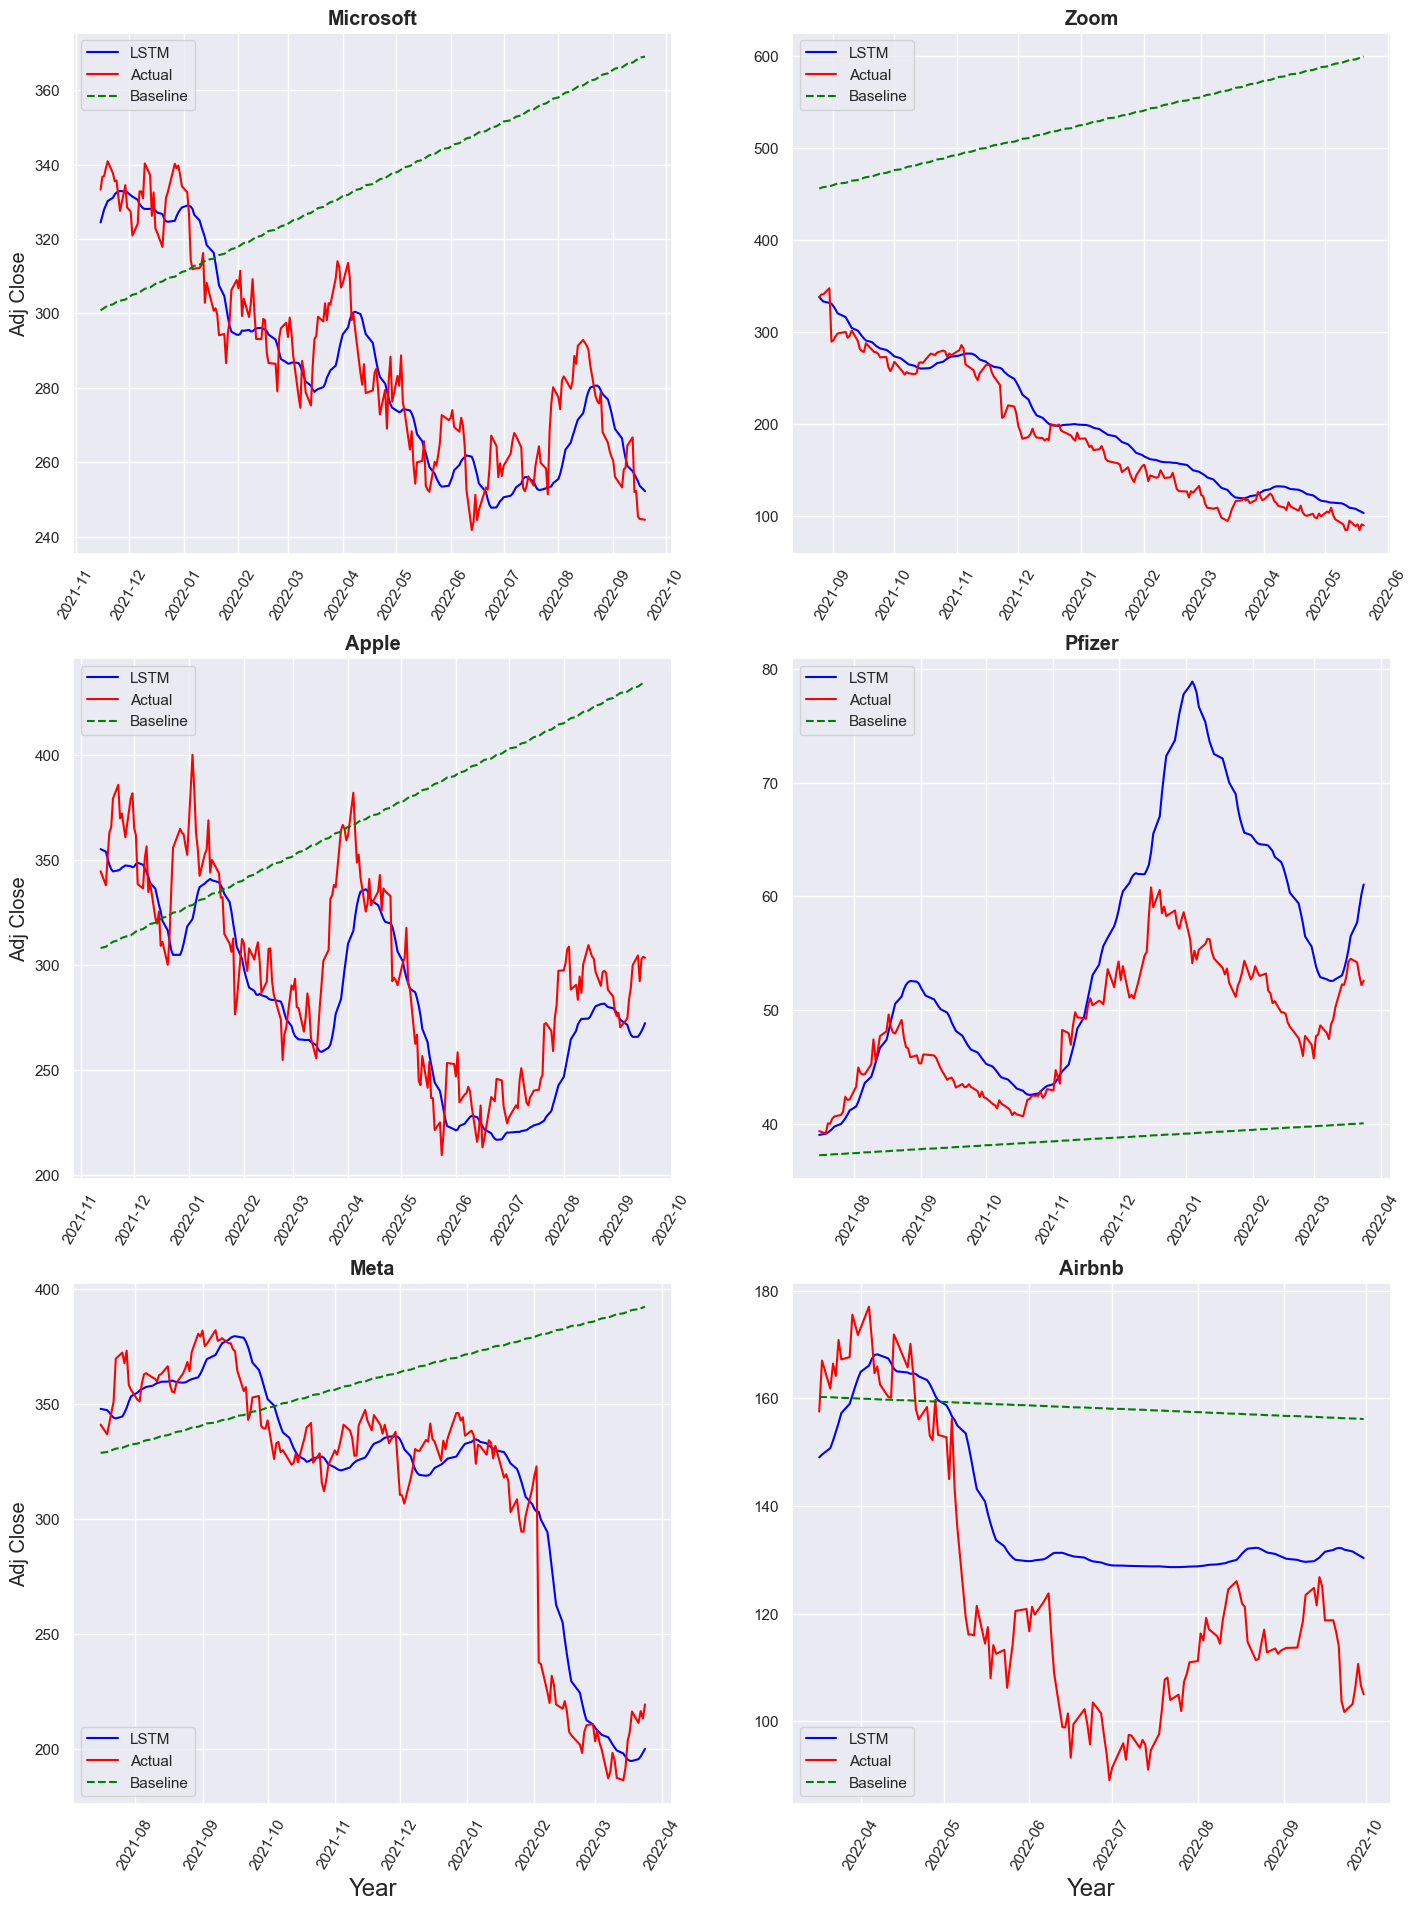

In [9]:
plt.figure(figsize = (17, 23))

# microsoft
plt.subplot(321)
plt.plot(microsoft_1.index.values[int(len(microsoft_1)*0.7):], pred_lstm1,
         color='blue', label='LSTM')
plt.plot(microsoft_1.index.values[int(len(microsoft_1)*0.7):], y_test_lstm1,
         color ='red', label='Actual')
plt.plot(microsoft_1.index.values[int(len(microsoft_1)*0.7):], pred_lr1,
         color = 'green', label='Baseline', linestyle = '--')

plt.xticks(rotation = 60)
plt.ylabel('Adj Close', fontsize='large')
plt.title('Microsoft', fontsize='large', fontweight='bold')
plt.legend()

# tesla
plt.subplot(323)
plt.plot(tesla_1.index.values[int(len(tesla_1)*0.7):], pred_lstm2,
         color='blue', label='LSTM')
plt.plot(tesla_1.index.values[int(len(tesla_1)*0.7):], y_test_lstm2,
         color ='red', label='Actual')
plt.plot(tesla_1.index.values[int(len(tesla_1)*0.7):], pred_lr2,
         color = 'green', label='Baseline', linestyle = '--')

plt.xticks(rotation = 60)
plt.ylabel('Adj Close', fontsize='large')
plt.title('tesla', fontsize='large', fontweight='bold')
plt.legend(loc = 'upper left')

# meta
plt.subplot(325)
plt.plot(meta_1.index.values[int(len(meta_1)*0.7):], pred_lstm3,
         color='blue', label='LSTM')
plt.plot(meta_1.index.values[int(len(meta_1)*0.7):], y_test_lstm3,
         color ='red', label='Actual')
plt.plot(meta_1.index.values[int(len(meta_1)*0.7):], pred_lr3,
         color = 'green', label='Baseline', linestyle = '--')

plt.xticks(rotation = 60)
plt.ylabel('Adj Close', fontsize='large')
plt.xlabel('Year', fontsize='x-large')
plt.title('Meta', fontsize='large', fontweight='bold')
plt.legend(loc = 'lower left')

# zoom
plt.subplot(322)
plt.plot(zoom_1.index.values[int(len(zoom_1)*0.7):], pred_lstm4,
         color='blue', label='LSTM')
plt.plot(zoom_1.index.values[int(len(zoom_1)*0.7):], y_test_lstm4,
         color ='red', label='Actual')
plt.plot(zoom_1.index.values[int(len(zoom_1)*0.7):], pred_lr4,
         color = 'green', label='Baseline',linestyle = '--')

plt.xticks(rotation = 60)
plt.title('Zoom', fontsize='large', fontweight='bold')
plt.legend()

# pfizer
plt.subplot(324)
plt.plot(pfizer_1.index.values[int(len(pfizer_1)*0.7):], pred_lstm5,
         color='blue', label='LSTM')
plt.plot(pfizer_1.index.values[int(len(pfizer_1)*0.7):], y_test_lstm5,
         color ='red', label='Actual')
plt.plot(pfizer_1.index.values[int(len(pfizer_1)*0.7):], pred_lr5,
         color = 'green', label='Baseline', linestyle = '--')

plt.xticks(rotation = 60)
plt.title('Pfizer', fontsize='large', fontweight='bold')
plt.legend(loc = 'upper left')

# airbnb
plt.subplot(326)
plt.plot(airbnb_1.index.values[int(len(airbnb_1)*0.7):], pred_lstm6,
         color='blue', label='LSTM')
plt.plot(airbnb_1.index.values[int(len(airbnb_1)*0.7):], y_test_lstm6,
         color ='red', label='Actual')
plt.plot(airbnb_1.index.values[int(len(airbnb_1)*0.7):], pred_lr6,
         color = 'green', label='Baseline',linestyle = '--')

plt.xticks(rotation = 60)
plt.xlabel('Year', fontsize='x-large')
plt.title('Airbnb', fontsize='large', fontweight='bold')
plt.legend(loc = 'lower left')

plt.savefig('Pred_result.png')
plt.show()



### Table for error of each model and each company

In [10]:
# make the dataframe
data = {'Microsoft': [mse_lstm1, mse_lr1, rs1], 
        'tesla': [mse_lstm2, mse_lr2, rs2], 
        'Meta': [mse_lstm3, mse_lr3, rs3], 
        'Zoom': [mse_lstm4, mse_lr4, rs4], 
        'Pfizer': [mse_lstm5, mse_lr5, rs5], 
        'Airbnb': [mse_lstm6, mse_lr6, rs6]}
df_results = pd.DataFrame(data, index = ['LSTM_MSE', 'Baseline_MSE', 'R^2'])
df_results

,Microsoft,Apple,Meta,Zoom,Pfizer,Airbnb
LSTM_MSE,127.876220,750.248955,302.225812,413.647225,78.862458,411.990943
Baseline_MSE,4194.546322,10789.060621,7258.756787,129998.518199,119.898617,1734.003388
R^2,-4.964780,-4.389340,-1.308755,-23.642721,-3.251027,-1.832788
